<a href="https://colab.research.google.com/github/Hyorim-Kim/numpi/blob/main/tfc16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)  # (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
print(x_train[0])  # 0번째 feature
print(y_train[0])  # 0번째 label   9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
print(set(y_train))

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # 정규화
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Flatten(),

    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Dense(units=10, activation='softmax')
])

print(model.summary())

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 21

Epoch 1/500
750/750 - 10s - loss: 0.2279 - accuracy: 0.9154 - val_loss: 0.2126 - val_accuracy: 0.9232 - 10s/epoch - 13ms/step
Epoch 2/500
750/750 - 6s - loss: 0.2247 - accuracy: 0.9180 - val_loss: 0.2148 - val_accuracy: 0.9236 - 6s/epoch - 8ms/step
Epoch 3/500
750/750 - 4s - loss: 0.2224 - accuracy: 0.9183 - val_loss: 0.2157 - val_accuracy: 0.9216 - 4s/epoch - 5ms/step
Epoch 4/500
750/750 - 3s - loss: 0.2260 - accuracy: 0.9171 - val_loss: 0.2246 - val_accuracy: 0.9198 - 3s/epoch - 4ms/step
Epoch 5/500
750/750 - 5s - loss: 0.2205 - accuracy: 0.9210 - val_loss: 0.2183 - val_accuracy: 0.9198 - 5s/epoch - 7ms/step
Epoch 6/500
750/750 - 3s - loss: 0.2191 - accuracy: 0.9195 - val_loss: 0.2122 - val_accuracy: 0.9233 - 3s/epoch - 4ms/step
Epoch 7/500
750/750 - 3s - loss: 0.2186 - accuracy: 0.9193 - val_loss: 0.2180 - val_accuracy: 0.9195 - 3s/epoch - 4ms/step
Epoch 8/500
750/750 - 3s - loss: 0.2188 - accuracy: 0.9203 - val_loss: 0.2272 - val_accuracy: 0.9185 - 3s/epoch - 5ms/step
Epoch 9/500
7

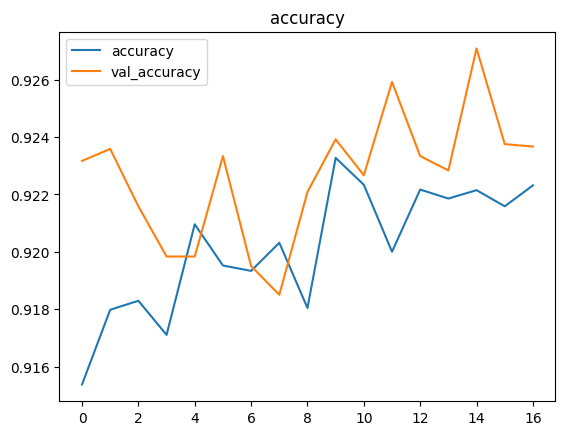

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # sparse_categorical_crossentropy XXX

from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

es = EarlyStopping(monitor='val_loss', patience=5)  # 보통 10

history = model.fit(x_train, y_train, batch_size=64, epochs=500, verbose=2, validation_split=0.2, callbacks=[es])

print(history.history)

# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc : ', train_loss, train_acc)
print('test_loss, test_acc : ', test_loss, test_acc)

history = history.history

# 시각화
import matplotlib.pyplot as plt

def plot_acc(title = None):
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.legend()

plot_acc('accuracy')
plt.show()

In [ ]:
# VGGNet style 네트워크
# dataset은 Fashion MNIST with CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 256)       295168    
                                                      

Epoch 1/500
750/750 - 10s - loss: 0.3740 - accuracy: 0.8646 - val_loss: 0.2939 - val_accuracy: 0.8882 - 10s/epoch - 13ms/step
Epoch 2/500
750/750 - 9s - loss: 0.3243 - accuracy: 0.8837 - val_loss: 0.2571 - val_accuracy: 0.9056 - 9s/epoch - 13ms/step
Epoch 3/500
750/750 - 9s - loss: 0.2914 - accuracy: 0.8937 - val_loss: 0.2410 - val_accuracy: 0.9107 - 9s/epoch - 12ms/step
Epoch 4/500
750/750 - 9s - loss: 0.2765 - accuracy: 0.8998 - val_loss: 0.2228 - val_accuracy: 0.9190 - 9s/epoch - 12ms/step
Epoch 5/500
750/750 - 9s - loss: 0.2584 - accuracy: 0.9078 - val_loss: 0.2404 - val_accuracy: 0.9081 - 9s/epoch - 12ms/step
Epoch 6/500
750/750 - 9s - loss: 0.2468 - accuracy: 0.9099 - val_loss: 0.2135 - val_accuracy: 0.9206 - 9s/epoch - 12ms/step
Epoch 7/500
750/750 - 9s - loss: 0.2335 - accuracy: 0.9140 - val_loss: 0.2022 - val_accuracy: 0.9257 - 9s/epoch - 12ms/step
Epoch 8/500
750/750 - 9s - loss: 0.2340 - accuracy: 0.9168 - val_loss: 0.2048 - val_accuracy: 0.9216 - 9s/epoch - 12ms/step
Epoch 

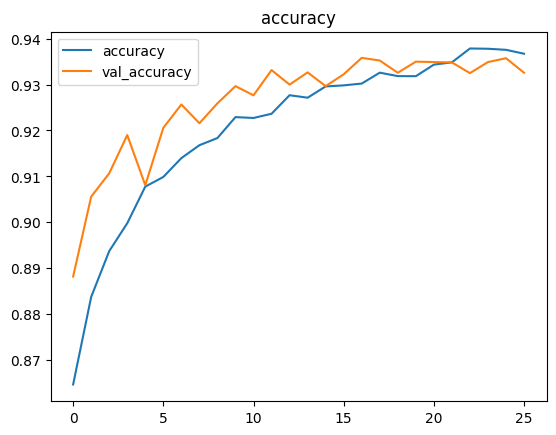

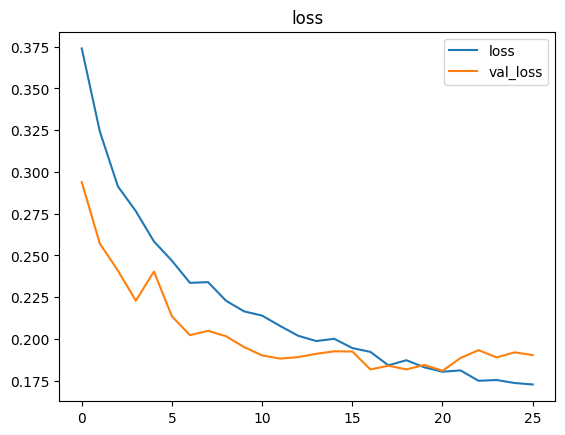

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, batch_size=64, epochs=500, verbose=2, validation_split=0.2, callbacks=[es])

print(history.history)

# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc : ', train_loss, train_acc)
print('test_loss, test_acc : ', test_loss, test_acc)

history = history.history

# 시각화
import matplotlib.pyplot as plt

def plot_acc(title = None):
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.legend()

plot_acc('accuracy')
plt.show()

def plot_loss(title = None):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title(title)
    plt.legend()

plot_loss('loss')
plt.show()